# Naive-Bayes and SVC Classifier

Using TfidVectorizer and SMOTE for Oversampling

## Data Processing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from src.dataset.process_data import load_dataset

In [3]:
df = load_dataset('data/blooms_dataset.csv', clean=True)
categories = ["Remember", "Understand", "Apply", "Analyse", "Evaluate", "Create"]

# split into training and test set
train, test = train_test_split(df, test_size=0.2, random_state=1234)

##  Model Building and Analysis

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def generate_model(model):
    # Fit text to labels
    model.fit(train.Text, train.Label)

    # Generate blooms label on test set
    labels = model.predict(test.Text)

    # Heatmap of model
    mat = confusion_matrix(test.Label, labels)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
                , xticklabels=categories
                , yticklabels=categories)

    plt.xlabel('true label')
    plt.ylabel('predicted label')

    print(classification_report(test.Label, labels))
    # Model Accuracy, how often is the classifier correct?

    acc = accuracy_score(test.Label, labels)
    print("Accuracy:", acc)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

## NB (TF)

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       308
           1       0.64      0.98      0.77       465
           2       0.96      0.57      0.71       141
           3       0.97      0.52      0.67       112
           4       0.89      0.84      0.86       118
           5       1.00      0.47      0.64        91

    accuracy                           0.76      1235
   macro avg       0.89      0.67      0.74      1235
weighted avg       0.82      0.76      0.75      1235

Accuracy: 0.7578947368421053


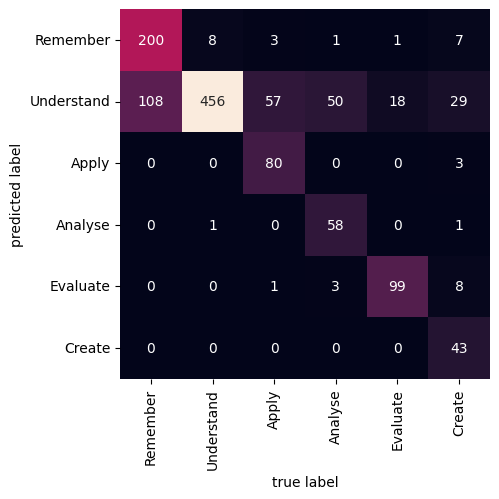

In [6]:
# Creating model based on Multinomial Naive Bayes with TfidfVectorizer
model_NB = Pipeline([
   ('vect', TfidfVectorizer()),
   ('mnb', MultinomialNB())
])

generate_model(model_NB)

## NB (TF + SM)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       308
           1       0.86      0.83      0.84       465
           2       0.76      0.84      0.80       141
           3       0.68      0.83      0.75       112
           4       0.87      0.92      0.89       118
           5       0.83      0.86      0.84        91

    accuracy                           0.83      1235
   macro avg       0.81      0.84      0.82      1235
weighted avg       0.83      0.83      0.83      1235

Accuracy: 0.8267206477732794


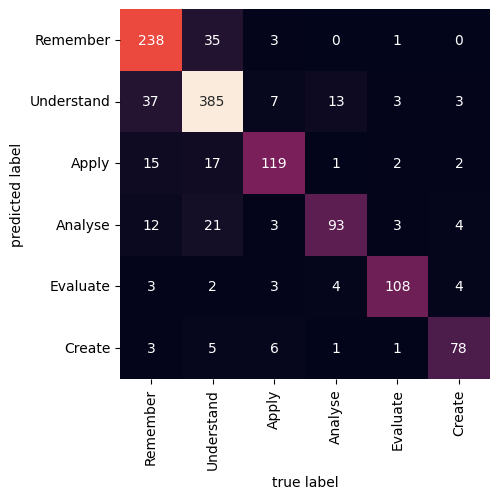

In [7]:
# Creating model based on Multinomial Naive Bayes with TfidfVectorizer and SMOTE for oversampling
model_NB = Pipeline([
   ('vect', TfidfVectorizer()),
   ('smote', SMOTE(random_state=12)),
   ('mnb', MultinomialNB())
])

generate_model(model_NB)

## Sample Testing

In [8]:
category_dict = {
    0: "Remember",
    1: "Understand",
    2: "Apply",
    3: "Analyse",
    4: "Evaluate",
    5: "Create",
}

def predict_blooms(text, model):
    print(model.predict_proba([text]))
    blooms = model.predict([text])
    print("Predicted Class:", category_dict[blooms[0]])

In [9]:
task = "Develop new project ideas"

print("NAIVE BAYES PREDICTION:")
predict_blooms(task, model_NB)

NAIVE BAYES PREDICTION:
[[0.01005219 0.00523168 0.12249614 0.12893732 0.04645889 0.68682378]]
Predicted Class: Create


## SVC (TF)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       308
           1       0.78      0.93      0.85       465
           2       0.97      0.79      0.88       141
           3       0.97      0.70      0.81       112
           4       0.97      0.87      0.92       118
           5       0.96      0.78      0.86        91

    accuracy                           0.86      1235
   macro avg       0.92      0.82      0.86      1235
weighted avg       0.87      0.86      0.86      1235

Accuracy: 0.8599190283400809


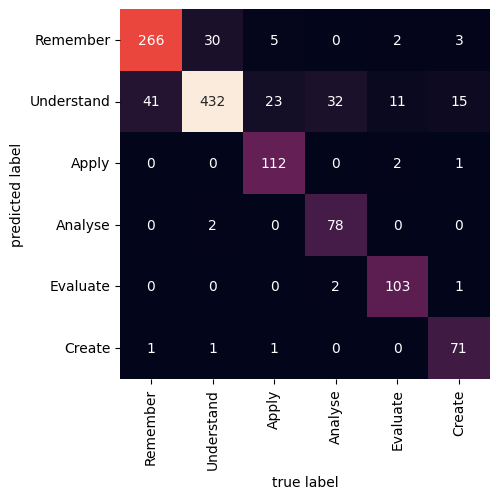

In [10]:
# Creating model based on SVC with TfidfVectorizer
model_SVC = Pipeline([
   ('vect', TfidfVectorizer()),
   ('mnb', SVC())
])

generate_model(model_SVC)

## SVC (TF + SM)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       308
           1       0.80      0.92      0.86       465
           2       0.98      0.81      0.89       141
           3       0.97      0.75      0.84       112
           4       0.99      0.87      0.93       118
           5       0.95      0.82      0.88        91

    accuracy                           0.87      1235
   macro avg       0.93      0.84      0.88      1235
weighted avg       0.88      0.87      0.87      1235

Accuracy: 0.8712550607287449


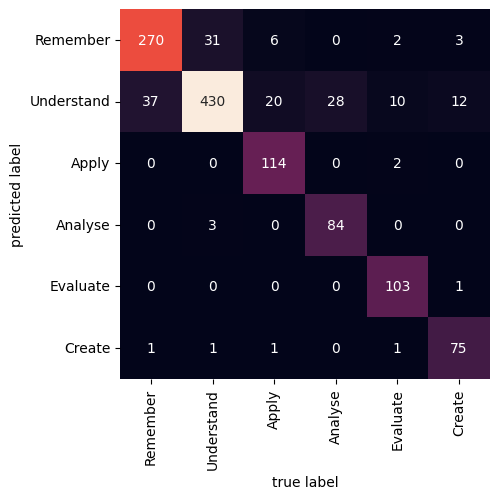

In [11]:
# Creating model based on SVC with TfidfVectorizer and SMOTE for oversampling
model_SVC = Pipeline([
   ('vect', TfidfVectorizer()),
   ('smote', SMOTE(random_state=12)),
   ('mnb', SVC())
])

generate_model(model_SVC)

## Sample Testing

In [17]:
category_dict = {
    0: "Remember",
    1: "Understand",
    2: "Apply",
    3: "Analyse",
    4: "Evaluate",
    5: "Create",
}

def predict_blooms(text, model):
    blooms = model.predict([text])
    print("Predicted Class:", category_dict[blooms[0]])

In [18]:
task = "Develop new project ideas"

print("SVC PREDICTION:")
predict_blooms(task, model_NB)

SVC PREDICTION:
Predicted Class: Create
